## Israel vs Palestine conflict casualties on human lives

#### This a descriptive EDA analysis about the casulaties because of the conflicts between these two nations over the time period 2000-2023. 
#### Dataset (some recent years data were included) is collected from Kaggle: https://www.kaggle.com/datasets/zusmani/palestine-body-count



### Dataset and Necessary Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline



/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Loading Dataset

df = pd.read_csv('/Users/rising.volkan007/Desktop/Israel vs Palestine/Palestine Body Count.csv' , sep=';')


In [3]:
df. head()

,Year,Month,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
0,2000,DECEMBER,781,NaN,51,8.0
1,2000,NOVEMBER,3838,NaN,112,22.0
2,2000,OCTOBER,5984,NaN,104,10.0
3,2000,SEPTEMBER,NaN,NaN,16,1.0
4,2001,DECEMBER,304,NaN,67,36.0


In [4]:
df. describe

<bound method NDFrame.describe of      Year      Month Palestinians Injuries Israelis Injuries  \
0    2000   DECEMBER                   781               NaN   
1    2000   NOVEMBER                  3838               NaN   
2    2000    OCTOBER                  5984               NaN   
3    2000  SEPTEMBER                   NaN               NaN   
4    2001   DECEMBER                   304               NaN   
..    ...        ...                   ...               ...   
246  2021      MARCH                   NaN               NaN   
247  2021      APRIL                   NaN               NaN   
248  2021        MAY                   NaN               NaN   
249  2022     AUGUST                   NaN               NaN   
250  2023    OCTOBER                   NaN               NaN   

     Palestinians Killed  Israelis Killed  
0                     51              8.0  
1                    112             22.0  
2                    104             10.0  
3                    

## Data Cleaning

In [5]:
# Checking for missing values
missing_values = df.isnull().sum()
missing_values

Year                       0
Month                      0
Palestinians Injuries     56
Israelis Injuries        119
Palestinians Killed        0
Israelis Killed            1
dtype: int64

In [6]:
data=df.fillna(0) # Filling nan and null values with 0

In [7]:
# Defining a custom function to remove decimal points
def remove_decimal_point(value):
    if isinstance(value, str):
        return value.replace('.', '')
    return value

# Applying the function to the 'Year' and 'Israelis Killed' columns
data['Year'] = data['Year'].apply(remove_decimal_point)
data['Israelis Killed'] = data['Israelis Killed'].apply(remove_decimal_point)

# Converting the columns to integers
data['Year'] = data['Year'].astype(int)
data['Israelis Killed'] = data['Israelis Killed'].astype(int)



In [8]:
data.head()

,Year,Month,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
0,2000,DECEMBER,781,0,51,8
1,2000,NOVEMBER,3838,0,112,22
2,2000,OCTOBER,5984,0,104,10
3,2000,SEPTEMBER,0,0,16,1
4,2001,DECEMBER,304,0,67,36


In [9]:
data['Month'].unique()

array(['DECEMBER', 'NOVEMBER', 'OCTOBER', 'SEPTEMBER', 'AUGUST', 'JULY',
       'JUNE', 'MAY', 'APRIL', 'MARCH', 'FEBRUARY', 'JANUARY',
       'MAY & JUNE', 'MAY '], dtype=object)

#### Some data in the Month column needs to be fixed

In [10]:
# Filtering rows with 'Month' equal to 'MAY & JUNE'
may_june_data = data[data['Month'] == 'MAY & JUNE']

# Accessing the 'Palestinians Injuries' and 'Israelis Injuries' and Killed columns
may_june_palestinians_injuries = may_june_data['Palestinians Injuries']
may_june_israelis_injuries = may_june_data['Israelis Injuries']

may_june_palestinians_killed = may_june_data['Palestinians Killed']
may_june_israelis_killed = may_june_data['Israelis Killed']


In [11]:
print(may_june_data.head())



     Year       Month Palestinians Injuries Israelis Injuries  \
203  2017  MAY & JUNE           (incl. Jun)       (incl. Jun)   

     Palestinians Killed  Israelis Killed  
203                    6                0  


#### Some string data were present in the injuries column for both nations. we need to replace those strings with proper integer values

In [12]:
# Defining a list of strings to search for and replace
strings_to_replace = ['(incl. Jun)', '(incl. Aug)']

# Iterating through the columns and apply replacements
for column in ['Palestinians Injuries', 'Israelis Injuries']:
    for string_to_replace in strings_to_replace:
        data[column] = data[column].apply(lambda x: '0' if x == string_to_replace else x)

# Converting the columns to integers, and handle any non-integer values
data['Palestinians Injuries'] = data['Palestinians Injuries'].apply(lambda x: int(float(x)) if str(x).replace('.', '', 1).isdigit() else x)
data['Israelis Injuries'] = data['Israelis Injuries'].apply(lambda x: int(float(x)) if str(x).replace('.', '', 1).isdigit() else x)



#### '0' is substituted for a list of strings in the 'Palestinians Injuries' and 'Israelis Injuries' columns by applying this code. Non-integer data are converted to integers by applying the lambda function, which replaces any non-numeric values with '0'. It guarantees that the data is prepared for analysis and is cleansed.

In [13]:
data.head(150)

,Year,Month,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
0,2000,DECEMBER,781,0,51,8
1,2000,NOVEMBER,3838,0,112,22
2,2000,OCTOBER,5984,0,104,10
3,2000,SEPTEMBER,0,0,16,1
4,2001,DECEMBER,304,0,67,36
...,...,...,...,...,...,...
145,2012,MARCH,404,16,28,0
146,2012,FEBRUARY,256,14,2,0
147,2012,JANUARY,60,3,2,0
148,2013,DECEMBER,159,4,5,1


In [14]:
data['Palestinians Injuries'].unique()

array([  781,  3838,  5984,     0,   304,   160,   407,   657,   502,
         394,   319,   932,   715,   927,   598,   471,   185,   264,
         388,   353,   186,   374,   299,   181,   523,   870,   429,
         330,   322,   106,   289,   226,   191,    34,   367,   239,
         303,   379,   244,   292,   161,    98,   343,   579,   287,
         251,   377,   545,   346,   417,   437,   168,   166,    99,
          81,    90,   130,   165,   116,   183,    68,    42,   164,
          73,   491,   180,   196,   266,   799,   198,   257,   254,
         203,   194,    88, 13720,   127,   152,   135,   154,    67,
         162,   281,   115,   153,   256,   104,   195,    30,    80,
          36,    26,    89,    82,   136,    87,    65,  5557,   105,
         147,   148,    46,    85,   118,   119,   402,    92,    86,
         210,    63,   110,   149,   156,   159,   397,   193,   204,
         143,  2252,   169,   202,   231,   703,   404,    60,   320,
         137,   138,

In [15]:
data['Israelis Injuries'].unique()

array([   0,   88,   17,   46,   25,   16,  105,   20,   19,   62,   61,
         12,   30,   24,   10,   41,   26,   14,   78,   47,    6,   13,
         87,   56,    7,   22,   15,   35,    5,   11,   21,   59,    3,
          9,   36,  253,    1,    4,   33,   55,   32, 2347,   28,   43,
         50,   80,   39,    8,   18,    2,   27,   23,   37])

In [16]:
data[data['Month'] == 'MAY & JUNE'] # string data in this row is replaced with 0

,Year,Month,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
203,2017,MAY & JUNE,0,0,6,0


In [17]:
data['Month'] = data['Month'].replace('MAY & JUNE', 'MAY') # Merging May & June with May

In [18]:
data[(data['Month'] == 'MAY') & (data['Year'] == 2017)] # string data in this row is replaced with 0


,Year,Month,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
203,2017,MAY,0,0,6,0


In [19]:
data['Israelis Killed'] = pd.to_numeric(data['Israelis Killed'])
data['Palestinians Killed'] = pd.to_numeric(data['Palestinians Killed'])
data['Israelis Injuries'] = pd.to_numeric(data['Israelis Injuries'])
data['Palestinians Injuries'] = pd.to_numeric(data['Palestinians Injuries'])

#### Above line code converts the columns 'Israelis Killed,' 'Palestinians Killed,' 'Israelis Injuries,' and 'Palestinians Injuries' to numeric data types, ensuring they are treated as numbers for analysis. It's useful for numeric data processing in the dataset.

## Visualization

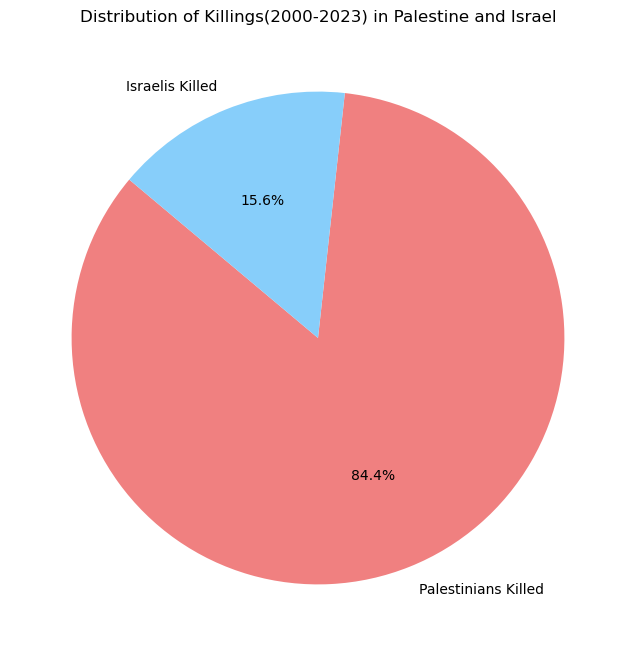

In [20]:
# Calculating the total number of killings in Palestine and Israel
total_palestinian_killings = data['Palestinians Killed'].sum()
total_israeli_killings = data['Israelis Killed'].sum()

# Creating data for the pie chart
labels = ['Palestinians Killed', 'Israelis Killed']
sizes = [total_palestinian_killings, total_israeli_killings]
colors = ['lightcoral', 'lightskyblue']

# Creating the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Killings(2000-2023) in Palestine and Israel')

# Displaying the pie chart
plt.show()

#### Above pie chart shows the percentages of getting killed over the time period from 2000-2023. The results indicates majority of Palestinians got killed over the conflict 

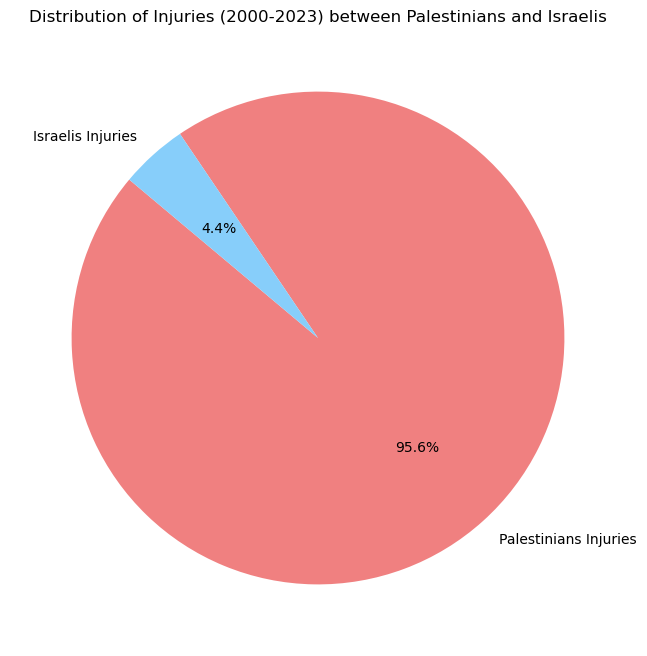

In [21]:
# Calculating the total number of injuries for Palestinians and Israelis
total_palestinian_injuries = data['Palestinians Injuries'].sum()
total_israeli_injuries = data['Israelis Injuries'].sum()

# Creating data for the pie chart
labels = ['Palestinians Injuries', 'Israelis Injuries']
sizes = [total_palestinian_injuries, total_israeli_injuries]
colors = ['lightcoral', 'lightskyblue']

# Creating the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Injuries (2000-2023) between Palestinians and Israelis')

# Displaying the pie chart
plt.show()

#### In this pie chart the injuries percentages were shown over the time period and here again it is visible that Palestinians got mostly injured in every conflicts.

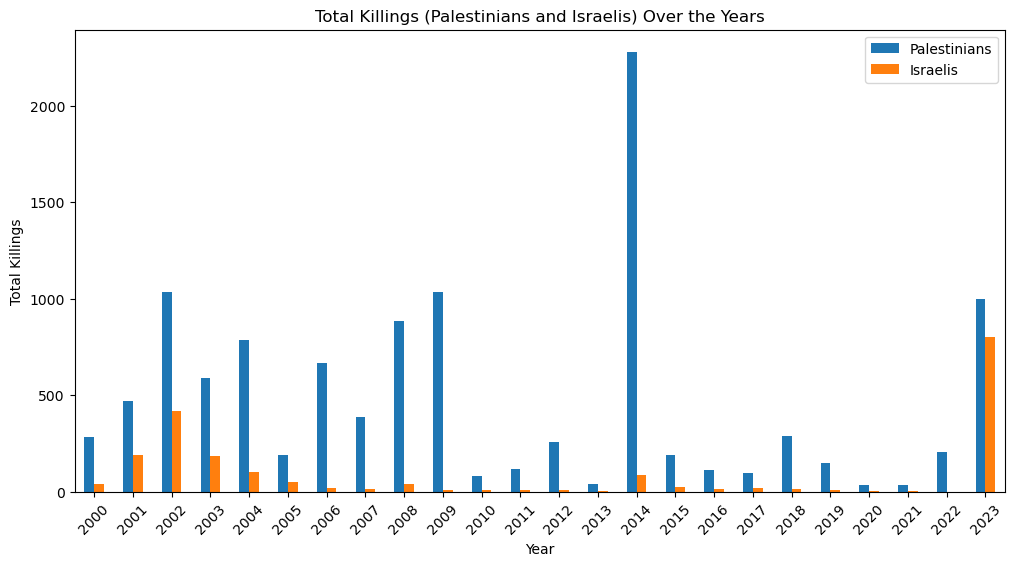

In [22]:
# Grouping the data by 'Year' and sum the total killings for both Palestinians and Israelis
yearly_killings = data.groupby('Year')[['Palestinians Killed', 'Israelis Killed']].sum()

# Creating a grouped bar chart
ax = yearly_killings.plot(kind='bar', figsize=(12, 6,))

# Customizing the appearance
plt.title('Total Killings (Palestinians and Israelis) Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Killings')
plt.legend(['Palestinians', 'Israelis'])
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Showing the plot
plt.show()


#### This bar chart shows the total killings in both nations over the years. it is quite visible mostly got killed in Palestine. Specially in 2014 the number is so high because of the Gaza War. whereas in 2023 the number of israelis got killed is higher which increases the tensions between this region.



In [23]:
data_2014= data.query('Year==2014') # results of the conflict in the year 2014
data_2014.head(10)

,Year,Month,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
160,2014,DECEMBER,350,15,5,0
161,2014,NOVEMBER,984,55,8,10
162,2014,OCTOBER,291,32,8,2
163,2014,SEPTEMBER,209,22,20,0
164,2014,AUGUST,13735,2347,614,9
165,2014,JULY,0,0,1590,59
166,2014,JUNE,326,5,10,3
167,2014,MAY,265,28,3,1
168,2014,APRIL,302,15,0,1
169,2014,MARCH,228,5,12,0


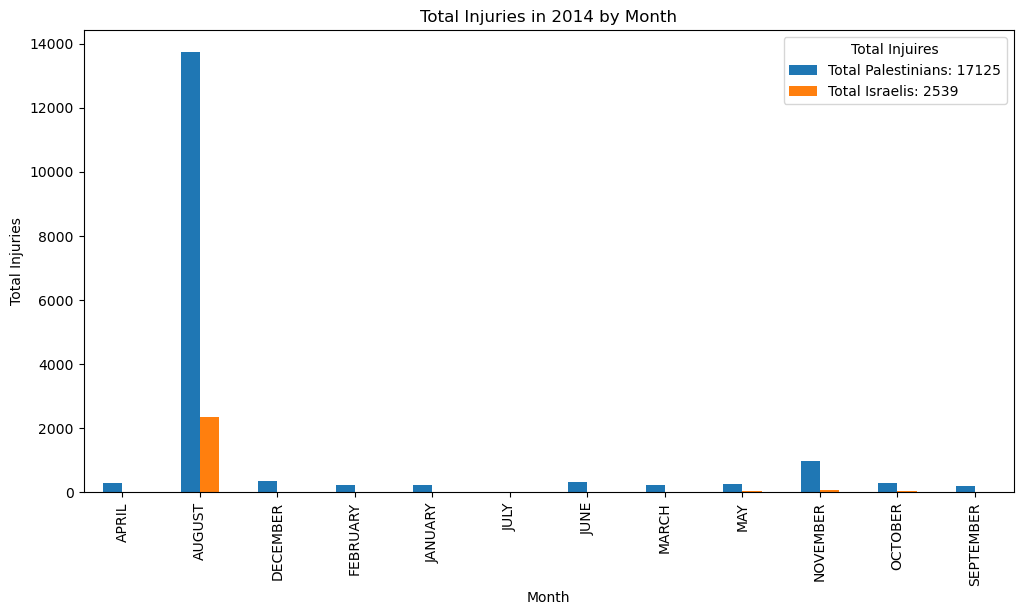

In [24]:

# Filtering the data for the year 2014
data_2014 = data[data['Year'] == 2014]

# Grouping the filtered data by 'Month' and sum the total injuries for both Palestinians and Israelis
monthly_injuries_2014 = data_2014.groupby('Month')[['Palestinians Injuries', 'Israelis Injuries']].sum()

# Creating a grouped bar chart
ax = monthly_injuries_2014.plot(kind='bar', figsize=(12, 6))
plt.title('Total Injuries in 2014 by Month')
plt.xlabel('Month')
plt.ylabel('Total Injuries')
plt.legend(['Palestinians', 'Israelis'])

# Calculating and display the total number of injuries for both Palestinians and Israelis
total_palestinians = monthly_injuries_2014['Palestinians Injuries'].sum()
total_israelis = monthly_injuries_2014['Israelis Injuries'].sum()
legend_labels = [f'Total Palestinians: {total_palestinians}',
                 f'Total Israelis: {total_israelis}']

# Setting the legend labels and corresponding colors
ax.legend(legend_labels, loc='upper right', prop={'size': 10}, title='Total Injuires')

plt.show()


#### In 2014, the number of injured was mostly on August. In that month the casualities were high

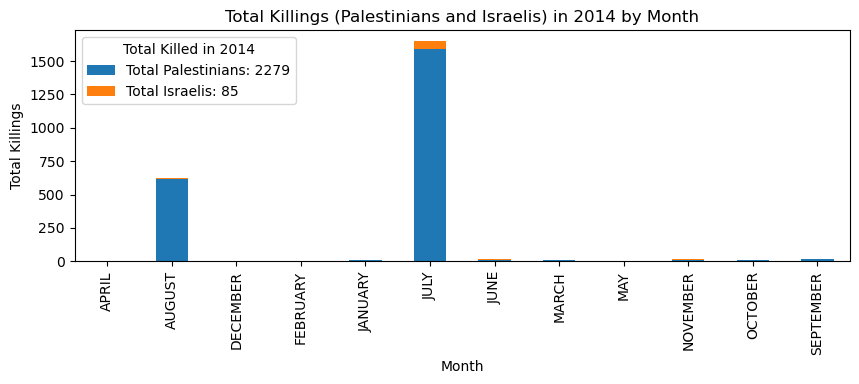

In [25]:


# Filter the data for the year 2014
data_2014 = data[data['Year'] == 2014]

# Group the filtered data by 'Month' and sum the total killings for both Palestinians and Israelis
monthly_killings_2014 = data_2014.groupby('Month')[['Palestinians Killed', 'Israelis Killed']].sum()

# Create a bar chart
ax = monthly_killings_2014.plot(kind='bar', stacked=True, figsize=(10, 3))
plt.title('Total Killings (Palestinians and Israelis) in 2014 by Month')
plt.xlabel('Month')
plt.ylabel('Total Killings')

# Calculate and display the total number of killings for both Palestinians and Israelis
total_palestinians = monthly_killings_2014['Palestinians Killed'].sum()
total_israelis = monthly_killings_2014['Israelis Killed'].sum()

# Manually create legend labels with colors
legend_labels = [f'Total Palestinians: {total_palestinians}',
                 f'Total Israelis: {total_israelis}']

# Set the legend labels and corresponding colors
ax.legend(legend_labels, loc='upper left', prop={'size': 10}, title='Total Killed in 2014')

plt.show()





#### This bar chart shows the killing in the month basis in 2014

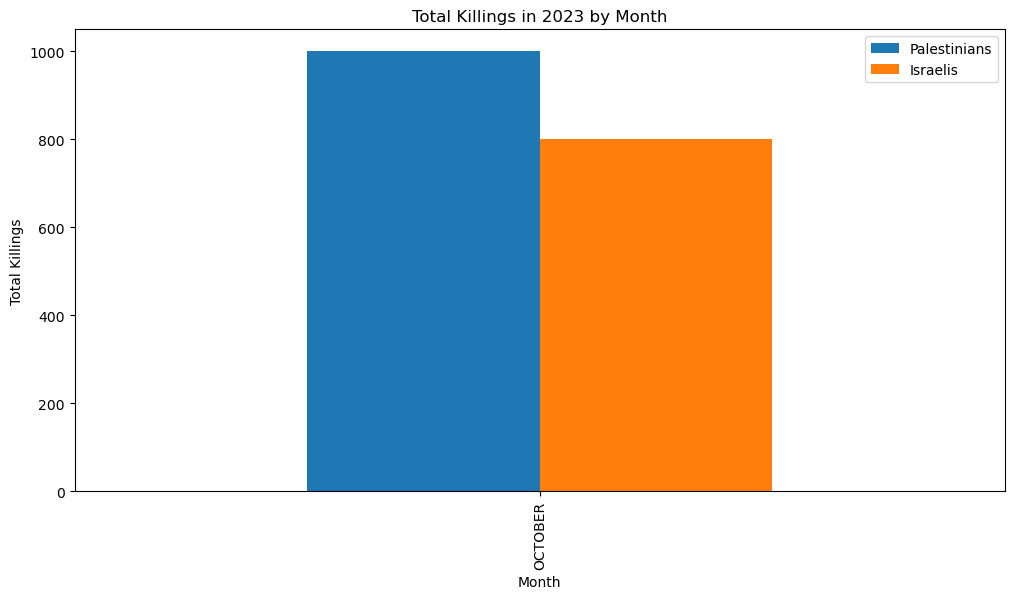

In [26]:
# Filtering the data for the year 2023
data_2023 = data[data['Year'] == 2023]

# Grouping the filtered data by 'Month' and sum the total killings for both Palestinians and Israelis
monthly_killings_2023 = data_2023.groupby('Month')[['Palestinians Killed', 'Israelis Killed']].sum()

# Creating a grouped bar chart
ax = monthly_killings_2023.plot(kind='bar', figsize=(12, 6))
plt.title('Total Killings in 2023 by Month')
plt.xlabel('Month')
plt.ylabel('Total Killings')
plt.legend(['Palestinians', 'Israelis'])

plt.show()



#### In 2023 (still counting) the tension between these nation got much worse which has led severe casualities and conflicts. The chart shows near 1000 Palestinians people killed so far and around 800 Israelis. 

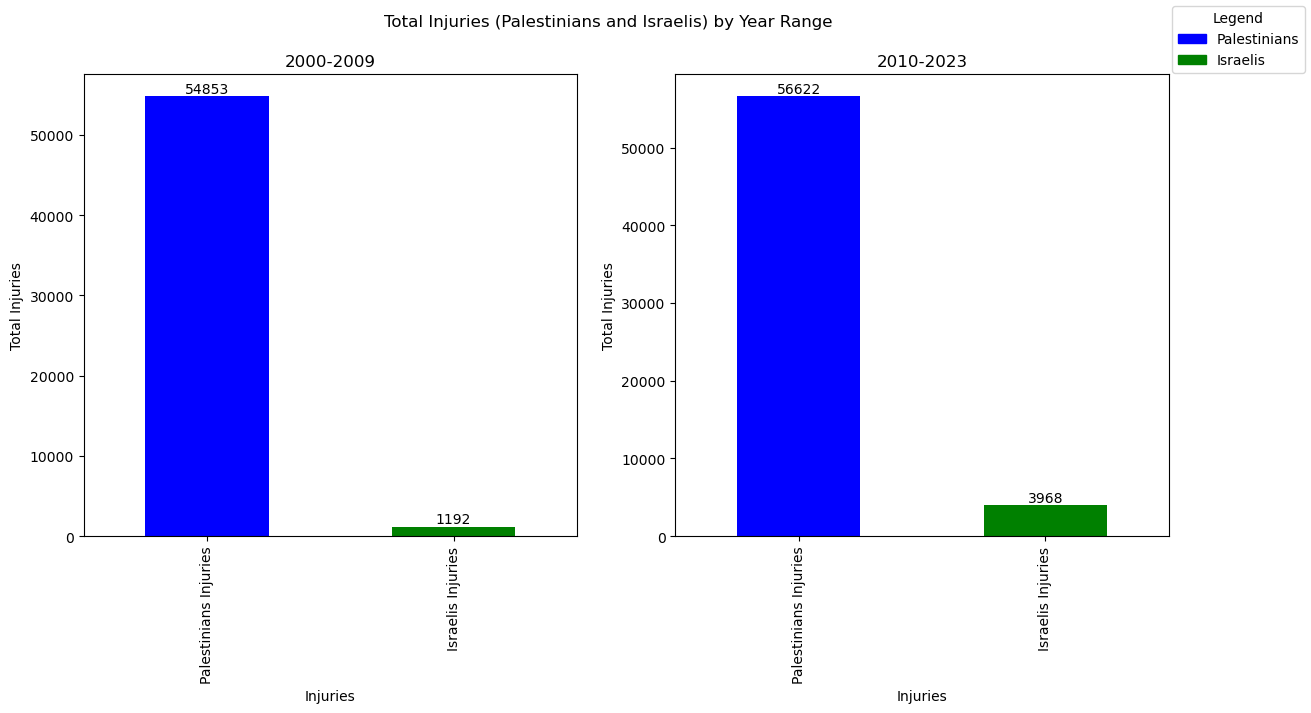

In [27]:



# Filtering the data for the years 2000-2009 and 2010-2023
data_2000_2009 = data[(data['Year'] >= 2000) & (data['Year'] <= 2009)]
data_2010_2023 = data[(data['Year'] >= 2010) & (data['Year'] <= 2023)]

# Calculating the total injuries for both Palestinians and Israelis for each group of years
total_injuries_2000_2009 = data_2000_2009[['Palestinians Injuries', 'Israelis Injuries']].sum().sum()
total_injuries_2010_2023 = data_2010_2023[['Palestinians Injuries', 'Israelis Injuries']].sum().sum()

# Creating two separate bar graphs with a legend and total numbers displayed
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Colors for Palestinians and Israelis
colors = ['b', 'g']

# Plotting the first bar graph for the years 2000-2009 (Blue for Palestinians, Green for Israelis)
data_2000_2009[['Palestinians Injuries', 'Israelis Injuries']].sum().plot(kind='bar', ax=axes[0], color=colors)
axes[0].set_title('2000-2009')
axes[0].set_xlabel('Injuries')
axes[0].set_ylabel('Total Injuries')

# Displaying total numbers at the top of each bar
for i, v in enumerate(data_2000_2009[['Palestinians Injuries', 'Israelis Injuries']].sum()):
    axes[0].text(i, v, str(v), ha='center', va='bottom')

# Plotting the second bar graph for the years 2010-2023 (Blue for Palestinians, Green for Israelis)
data_2010_2023[['Palestinians Injuries', 'Israelis Injuries']].sum().plot(kind='bar', ax=axes[1], color=colors)
axes[1].set_title('2010-2023')
axes[1].set_xlabel('Injuries')
axes[1].set_ylabel('Total Injuries')

# Displaying total numbers at the top of each bar
for i, v in enumerate(data_2010_2023[['Palestinians Injuries', 'Israelis Injuries']].sum()):
    axes[1].text(i, v, str(v), ha='center', va='bottom')

# Setting a common title for the figure
plt.suptitle('Total Injuries (Palestinians and Israelis) by Year Range')

# Creating a legend with distinct colors
legend_labels = ['Palestinians', 'Israelis']
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
fig.legend(legend_handles, legend_labels, loc='upper right', title='Legend')

plt.show()



#### These bar charts shows the comparison between the two different decades of the total injured numbers which indicates Palestinians were mostly Injured in all of the conflicts they faced.

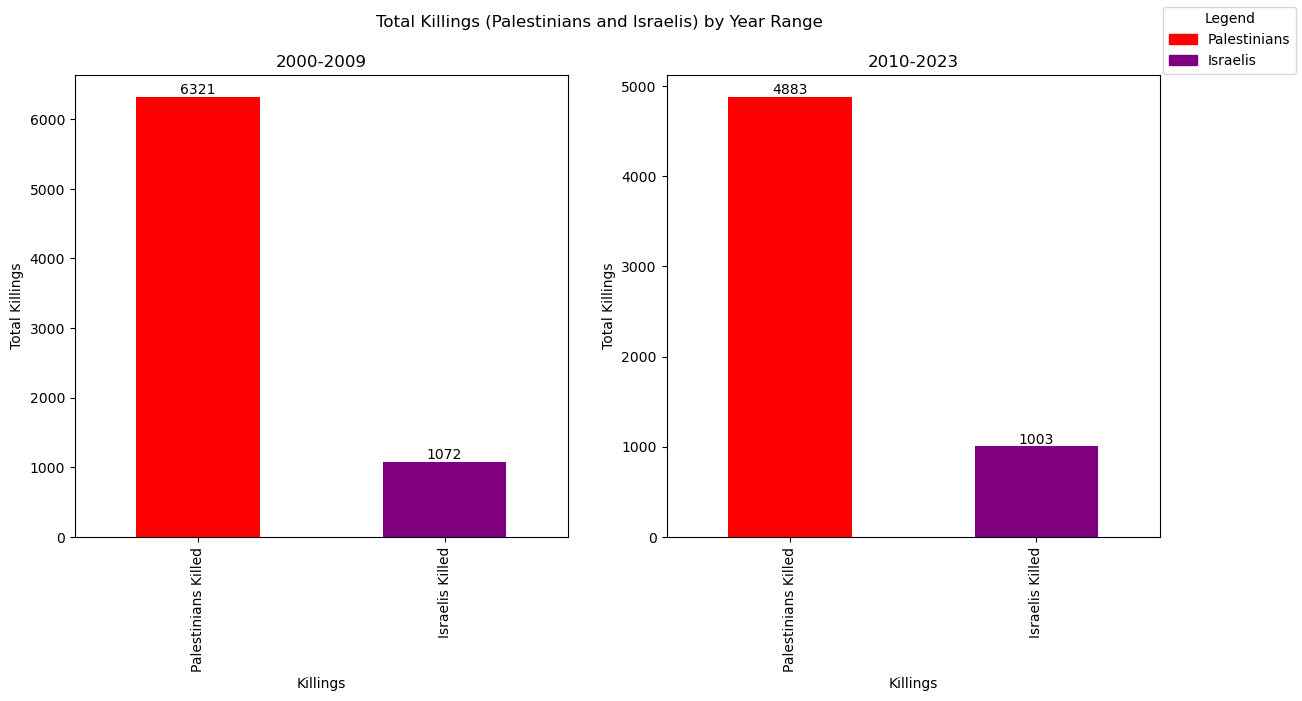

In [28]:

# Filtering the data for the years 2000-2009 and 2010-2023
data_2000_2009 = data[(data['Year'] >= 2000) & (data['Year'] <= 2009)]
data_2010_2023 = data[(data['Year'] >= 2010) & (data['Year'] <= 2023)]

# Calculating the total killings for both Palestinians and Israelis for each group of years
total_killings_2000_2009 = data_2000_2009[['Palestinians Killed', 'Israelis Killed']].sum().sum()
total_killings_2010_2023 = data_2010_2023[['Palestinians Killed', 'Israelis Killed']].sum().sum()

# Creating two separate bar graphs with a legend and total numbers displayed
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Colors for Palestinians and Israelis
colors = ['r', 'purple']

# Plotting the first bar graph for the years 2000-2009
data_2000_2009[['Palestinians Killed', 'Israelis Killed']].sum().plot(kind='bar', ax=axes[0], color=colors)
axes[0].set_title('2000-2009')
axes[0].set_xlabel('Killings')
axes[0].set_ylabel('Total Killings')

# Displaying total numbers at the top of each bar
for i, v in enumerate(data_2000_2009[['Palestinians Killed', 'Israelis Killed']].sum()):
    axes[0].text(i, v, str(v), ha='center', va='bottom')

# Plotting the second bar graph for the years 2010-2023
data_2010_2023[['Palestinians Killed', 'Israelis Killed']].sum().plot(kind='bar', ax=axes[1], color=colors)
axes[1].set_title('2010-2023')
axes[1].set_xlabel('Killings')
axes[1].set_ylabel('Total Killings')

# Displaying total numbers at the top of each bar
for i, v in enumerate(data_2010_2023[['Palestinians Killed', 'Israelis Killed']].sum()):
    axes[1].text(i, v, str(v), ha='center', va='bottom')

# Setting a common title for the figure
plt.suptitle('Total Killings (Palestinians and Israelis) by Year Range')

# Creating a legend with distinct colors
legend_labels = ['Palestinians', 'Israelis']
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
fig.legend(legend_handles, legend_labels, loc='upper right', title='Legend')

plt.show()


#### These bar charts showing the total number of dead people for both nations over two different decades. 

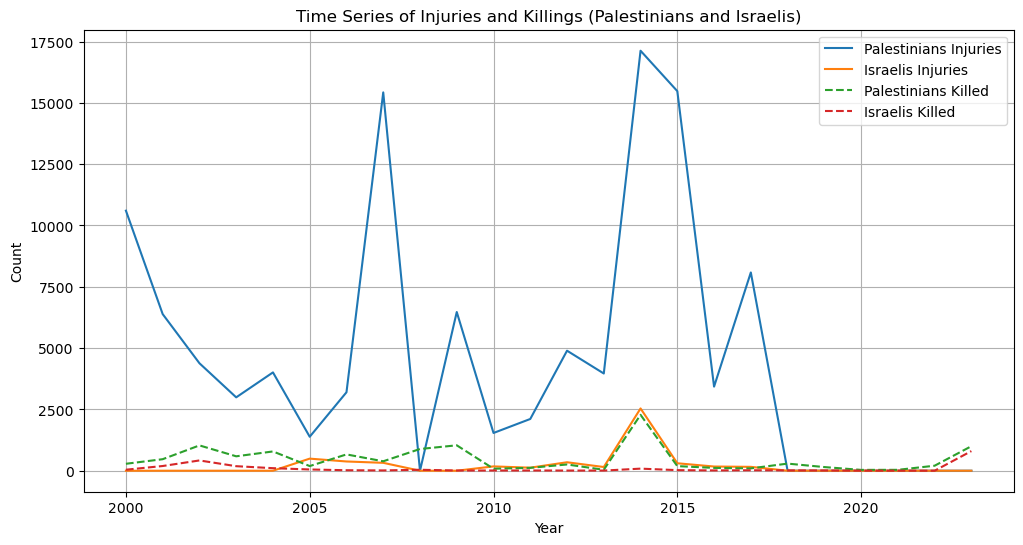

In [29]:

# Grouping the data by 'Year' and sum the total injuries and killings for both Palestinians and Israelis
yearly_data = data.groupby('Year')[['Palestinians Injuries', 'Israelis Injuries', 'Palestinians Killed', 'Israelis Killed']].sum()

# Creating a time series plot
fig, ax = plt.subplots(figsize=(12, 6))
yearly_data[['Palestinians Injuries', 'Israelis Injuries']].plot(ax=ax)
yearly_data[['Palestinians Killed', 'Israelis Killed']].plot(ax=ax, linestyle='--')

# Customizing the appearance
plt.title('Time Series of Injuries and Killings (Palestinians and Israelis)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(['Palestinians Injuries', 'Israelis Injuries', 'Palestinians Killed', 'Israelis Killed'])

# Showing the plot
plt.grid(True)
plt.show()


#### This time series analysis shows the injuries and killings counting over the years and it is clearly visible of the Palestinian sides have the highest peak in terms of injuries and whereas Israeli injuires and Palestinians dead were in close line in terms of time periods.

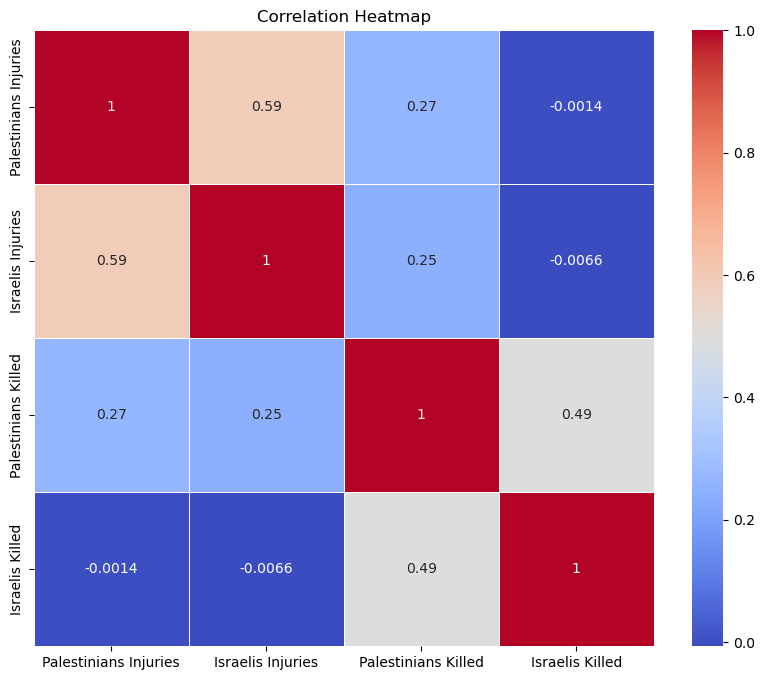

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric columns for correlation analysis, excluding 'Year'
numeric_columns = data[['Palestinians Injuries', 'Israelis Injuries', 'Palestinians Killed', 'Israelis Killed']]

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Set the title
plt.title('Correlation Heatmap')

# Show the heatmap
plt.show()



#### Heatmap:

Positive Correlation: A significant positive correlation is shown by values near 1. A complete positive correlation, for instance, is represented by a value of 1, and positive correlations are represented by numbers that are close to but less than 1.

Negative Correlation: A significant negative correlation is shown by values near -1. Perfect negative correlation is represented by a value of -1, and negative correlation is represented by values that are close to -1 but larger than -1.

Weak Correlation: A correlation between the variables is weak or nonexistent when the values are near 0.

"Palestinians Injured" and "Israelis Injured" have a positive correlation of 0.59, suggesting that when the number of Palestinians injured increases, the number of Israelis injured tends to increase as well.

"Palestinians Injured" and "Israelis Killed" have a negative correlation of -0.0014, which is very close to zero, indicating a very weak or no correlation between these two variables.

"Palestinians Killed" and "Israelis Killed" have a positive correlation of 0.49, suggesting some degree of positive correlation between the number of Palestinians killed and the number of Israelis killed.





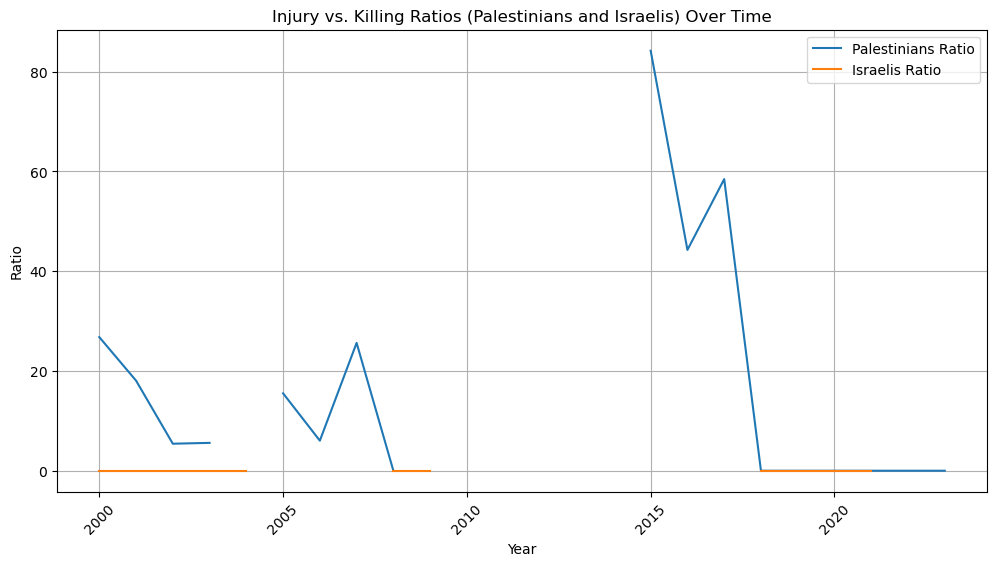

In [31]:


# Calculating the injury vs. killing ratios for Palestinians and Israelis
data['Palestinians Injury/Kill Ratio'] = data['Palestinians Injuries'] / data['Palestinians Killed']
data['Israelis Injury/Kill Ratio'] = data['Israelis Injuries'] / data['Israelis Killed']

# Grouping the data by 'Year' and calculate the mean ratios for each year
yearly_ratios = data.groupby('Year')[['Palestinians Injury/Kill Ratio', 'Israelis Injury/Kill Ratio']].mean()

# Creating a line plot for injury vs. killing ratios over time
fig, ax = plt.subplots(figsize=(12, 6))

plt.plot(yearly_ratios.index, yearly_ratios['Palestinians Injury/Kill Ratio'], label='Palestinians Ratio')
plt.plot(yearly_ratios.index, yearly_ratios['Israelis Injury/Kill Ratio'], label='Israelis Ratio')

# Customizing the appearance
plt.title('Injury vs. Killing Ratios (Palestinians and Israelis) Over Time')
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.legend()

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Showing the plot
plt.grid(True)
plt.show()


#### This line plot shows the ratio of Injury vs Killing . From the line plot it is clear that the Palestinians have the highest ratio in both injured and getting killed in 2014 and the ratio is more than 80%. Where the israelis ratio is significantly low near 0 %.